# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data reading and preprocessing

In [2]:
data = pd.read_csv("car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data = data.drop(["Owner","Car_Name"], axis=1)

In [4]:
data.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
dtype: int64

In [5]:
X = data.drop("Selling_Price",axis=1)
y = data["Selling_Price"]
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,5.59,27000,Petrol,Dealer,Manual
1,2013,9.54,43000,Diesel,Dealer,Manual
2,2017,9.85,6900,Petrol,Dealer,Manual
3,2011,4.15,5200,Petrol,Dealer,Manual
4,2014,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual
297,2015,5.90,60000,Petrol,Dealer,Manual
298,2009,11.00,87934,Petrol,Dealer,Manual
299,2017,12.50,9000,Diesel,Dealer,Manual


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

string_cols = ["Fuel_Type","Seller_Type","Transmission"]
transformer = ColumnTransformer([("One",OneHotEncoder(),string_cols)],remainder="passthrough")

X = transformer.fit_transform(X)
X

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0140e+03, 5.5900e+00,
        2.7000e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0130e+03, 9.5400e+00,
        4.3000e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0170e+03, 9.8500e+00,
        6.9000e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0090e+03, 1.1000e+01,
        8.7934e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0170e+03, 1.2500e+01,
        9.0000e+03],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0160e+03, 5.9000e+00,
        5.4640e+03]])

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2014.0,5.59,27000.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2013.0,9.54,43000.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2017.0,9.85,6900.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2011.0,4.15,5200.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2014.0,6.87,42450.0
...,...,...,...,...,...,...,...,...,...,...
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2016.0,11.60,33988.0
297,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2015.0,5.90,60000.0
298,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2009.0,11.00,87934.0
299,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2017.0,12.50,9000.0


In [8]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Applying the Regressor

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds

array([ 0.4093,  0.5912,  0.2612,  4.9595,  0.5589,  0.4743,  6.1295,
        1.0755,  8.0315,  5.0315,  0.5384,  6.9644,  2.137 ,  0.3966,
        1.0606,  5.6665,  8.3804,  6.7075,  7.061 ,  0.4159, 13.3826,
        3.546 ,  2.726 , 11.111 ,  4.437 ,  1.5635,  1.1672, 11.2048,
        4.432 ,  5.125 ,  2.842 ,  7.0417,  7.4134,  4.488 ,  5.5276,
        3.5435,  4.4213,  2.6655,  0.2106,  7.439 , 15.2767,  1.147 ,
        0.8105,  0.5355,  3.3755,  7.3923,  8.43  ,  0.7658,  7.7559,
        0.4453,  2.357 ,  8.7915,  5.4141,  7.5814,  0.7089,  0.4346,
        5.255 ,  9.5861,  0.7383,  4.8545,  0.2656])

In [11]:
y_preds

array([ 0.4093,  0.5912,  0.2612,  4.9595,  0.5589,  0.4743,  6.1295,
        1.0755,  8.0315,  5.0315,  0.5384,  6.9644,  2.137 ,  0.3966,
        1.0606,  5.6665,  8.3804,  6.7075,  7.061 ,  0.4159, 13.3826,
        3.546 ,  2.726 , 11.111 ,  4.437 ,  1.5635,  1.1672, 11.2048,
        4.432 ,  5.125 ,  2.842 ,  7.0417,  7.4134,  4.488 ,  5.5276,
        3.5435,  4.4213,  2.6655,  0.2106,  7.439 , 15.2767,  1.147 ,
        0.8105,  0.5355,  3.3755,  7.3923,  8.43  ,  0.7658,  7.7559,
        0.4453,  2.357 ,  8.7915,  5.4141,  7.5814,  0.7089,  0.4346,
        5.255 ,  9.5861,  0.7383,  4.8545,  0.2656])

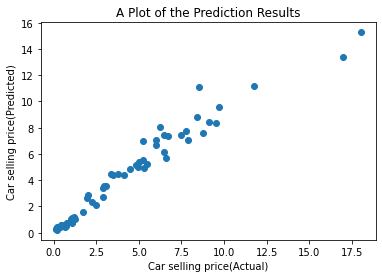

In [12]:
plt.scatter(np.array(y_test),y_preds)
plt.title("A Plot of the Prediction Results")
plt.xlabel("Car selling price(Actual)")
plt.ylabel("Car selling price(Predicted)")
plt.show()

In [13]:
y_test

179    0.31
149    0.51
197    0.16
274    5.30
167    0.42
       ... 
261    5.50
277    9.70
129    0.78
290    4.50
198    0.15
Name: Selling_Price, Length: 61, dtype: float64